###앙상블 학습
*   더 좋은 예측 결과를 만들기 위해 여러 개의 모델을 훈련하는 머신러닝 알고리즘
*   정형 데이터에서 가장 뛰어난 성능을 내는 머신러닝 알고리즘 중 하나

#### 대표적인 앙상블 학습

사이킷런
*   랜덤 포레스트 : 부트스트랩 샘플 사용. 대표 앙상블 학습 알고리즘
*   엑스트라 트리 : 결정 트리의 노드를 랜덤하게 분할함
*   그레이디언트 부스팅 : 이전 트리의 손실을 보완하는 식으로 얕은 결정 트리를 연속하여 추가함
*   히스토그램 기반 그레이디언트 부스팅 : 훈련 데이터를 256개 정수
구간으로 나누어 빠르고 높은 성능을 냄

그외 라이브러리 : XG Boost, LightGBM

### 랜덤포레스트

*   가장 대표적인 앙상블 학습 알고리즘
*   부트스트랩 샘플을 사용하고 일부 특성을 랜덤 선택하여 최선의 분할을 찾음
*   랜덤하게 선택한 샘플과 특성을 사용하기 때문에 과대적합을 막고 안정적인 성능을 얻을 수 있음


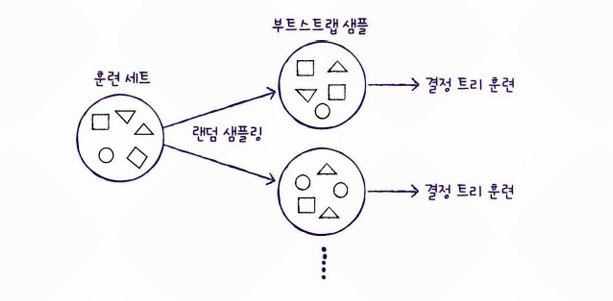




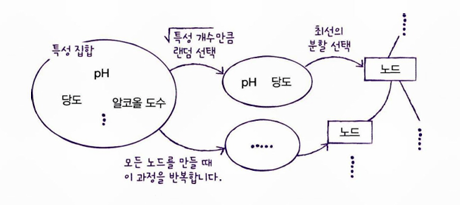

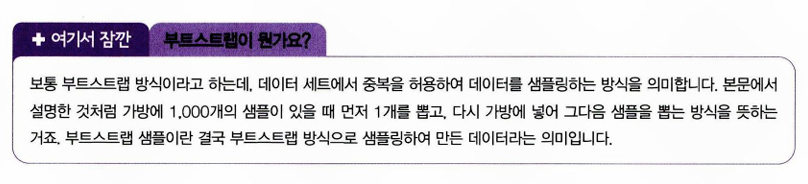

#### RandomForestClassifier : 랜덤 포레스트 분류 클래스
*   n_estimators : 앙상블을 구성할 트리의 개수 (기본값은 100)
*   criterion : 불순도 (기본값은 지니 불순도를 의미하는 'gini', 'entropy'를 선택하여 엔트로피 불순도 사용 가능)
* max_depth : 트리가 성장할 최대 깊이 (기본값은 None : 리프
노드가 순수하거나 min_samples_split보다 샘플 개수가 적을 때까지 성장)
* min_samples_split : 노드를 나누기 위한 최소 샘플 개수 (기본값은 2)
* max_features : 최적의 분할을 위해 탐색할 특성의 개수 (기본값은 sqrt : 특성 개수의 제곱근)
* bootstrap : 부트스트랩 샘플을 사용할지 지정 (기본값은 True)
* oob_score : OOB 샘플을 사용하여 훈련한 모델을 평가할지 지정 (기본값은 False)
* n_jobs : 병렬 실행에 사용할 CPU 코어 수를 지정 (기본값은 1 : 하나의 코어 사용, -1로 지정하면 시스템에 있는 모든 코어 사용)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# 데이터 불러오기
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [2]:
# 교차 검증 수행
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier는 기본적으로 100개의 결정 트리를 사용하므로 njobs 매개변수를 -1로 지정하여 모든 CPU 코어를 사용하는 것이 좋움
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
# return_train_score=True : 검증 점수뿐만 아니라 훈련 세트에 대한 점수도 같이 반환
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [3]:
# 특성 중요도
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [4]:
# OOB(Out Of Bag) 샘플 :  부트스트랩 샘플에 포함되지 않고 남는 샘플
# OOB 샘플을 사용하여 부트스트랩 샘플로 훈련한 결정 트리를 평가할 수 있음
# oob_score=True : 각 결정 트리의 OOB 점수를 평균하여 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


### 엑스트라 트리
*   랜덤 포레스트와 매우 비슷하지만 부트스트랩 샘플을 사용하지 않음
*   splitter = 'random'인 결정 트리 사용
*   노드 분할 시 최적의 분할을 찾지 않고 무작위로 분할하기 때문에 랜덤 포레스트보다 훈련 속도가 빠르지만 더 많은 트리가 필요






#### ExtraTreesClassifier: 엑스트라 트리 분류 클래스
* n_estimators, criterion, max_depth, min_samples_split, max_features : 랜덤 포레스트와 동일
* bootstrap : 부트스트랩 샘플을 사용할지 지정 (기본값은 False)
* oob_score : OOB 샘플을 사용하여 훈련한 모델을 평가할지 지정 (기본값은 False)
* n_jobs : 병렬 실행에 사용할 CPU 코어 수를 지정 (기본값은 1 : 하나의 코어 사용, -1로 지정하면 시스템에 있는 모든 코어 사용)

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
# 교차 검증 점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [6]:
# 특성 중요도
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


### 그레이디언트 부스팅
*   깊이가 얕은 트리를 연속적으로 추가하여 손실 함수를 최소화하는 앙상블 방법
*   경사 하강법을 사용하여 결정 트리를 앙상블에 추가
*   병렬로 훈련할 수 없기 때문에 훈련 속도가 조금 느리지만 더 좋은 성능을 얻을 수 있음



#### GradientBoostingClassifier : 그레이디언트 부스팅 분류 클래스
* loss : 손실 함수 지정 (기본값은 로지스틱 손실 함수를 의미하는 'log_loss')
* learning_rate : 트리가 앙상블에 기여하는 정도, 모델의 복잡도 제어 가능 (기본값은 0.1)
* n_estimators : 부스팅 단계를 수행하는 트리의 개수 (기본값은 100)
* subsample : 사용할 훈련 세트의 샘플 비율 (기본값은 1.0)
* max_depth : 개별 회귀 트리의 최대 깊이 (기본값은 3)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
# 교차 검증 점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [8]:
# 그레이디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강함
# 학습률을 증가시키고 트리의 개수를 늘리면 조금 더 성능 향상 가능
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,
                                random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [9]:
# 특성 중요도
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


### 히스토그램 기반 그레이디언트 부스팅
* 안정적인 결과와 높은 성능으로 가장 뛰어난 앙상블 학습
* 훈련 데이터를 256개의 구간으로 변환하여 사용하기 때문에 노드 분할 속도가 매우 빠름

#### HistGradientBoostingClassifier : 히스토그램 기반 그레이디언트 부스팅 분류 클래스
* learning_rate : 학습률 또는 감쇠율 (기본값은 0.1, 1.0이면 감쇠가 전혀 없음)
* max_iter : 부스팅 단계를 수행하는 트리의 개수 (기본값은 100)
* max_bins : 입력 데이터를 나눌 구간의 개수 (기본값은 255,  여기에 1개의 구간이 누락된 값을 위해 추가됨)

In [10]:
# 트리의 개수를 지정하는데 n_estimators 대신에 부스팅 반복 횟수를 지정하는 max_iter를 사용
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
# 교차 검증 점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [11]:
# 특성 중요도
# 히스토그램 기반 그레이디언트 부스팅은 자체적으로 특성 중요도 제공 x -  permutation_importance () 함수 사용
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [12]:
# 특성 중요도 from 테스트 세트
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [13]:
# 테스트 세트에서의 성능 확인
hgb.score(test_input, test_target)

0.8723076923076923

#### XGBoost

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [15]:
# tree_method 매개변수를 ‘hist’로 지정하면 히스토그램 기반 그레이디언트 부스팅 사용 가능
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
xgb._estimator_type = "classifier"
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
# 교차 검증 점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9567059184812372 0.8783915747390243


#### LightGBM
마이크로소프트에서 만든 히스토그램 기반 그레이디언트 부스팅 라이브러리

In [16]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
# 교차 검증 점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
